<a href="https://colab.research.google.com/github/LaxmanGhadi/ColabProjectsBeginners/blob/main/DL_Project_1_Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:31<00:00, 34.6MB/s]
100% 1.06G/1.06G [00:31<00:00, 35.8MB/s]


In [ ]:
import zipfile
zip_ref  =zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from numpy.ma.core import argmax
from keras import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten,BatchNormalization,Dropout

In [ ]:
#genetrors => reduces the load on processing by breaking data into smaller "blocks/batches"
#eg = image_dataset_from_directory()<- function
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size  = 32 ,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size  = 32 ,
    image_size = (256,256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize =

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds_mapped = train_ds.map(process)
validation_ds_mapped = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape  =(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding  ='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding  ='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides= 2 ,padding  ='valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_mapped,epochs=10,validation_data=validation_ds_mapped)

Epoch 1/10
625/625 [==============================] - 68s 108ms/step - loss: 0.7632 - accuracy: 0.6265 - val_loss: 0.6185 - val_accuracy: 0.6554
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5414 - accuracy: 0.7315 - val_loss: 0.5130 - val_accuracy: 0.7424
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4656 - accuracy: 0.7836 - val_loss: 0.7027 - val_accuracy: 0.7102
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4172 - accuracy: 0.8095 - val_loss: 0.5212 - val_accuracy: 0.7240
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3419 - accuracy: 0.8503 - val_loss: 0.5005 - val_accuracy: 0.7648
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2737 - accuracy: 0.8844 - val_loss: 0.4745 - val_accuracy: 0.7978
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1877 - accuracy: 0.9248 - val_loss: 0.5477 - val_ac

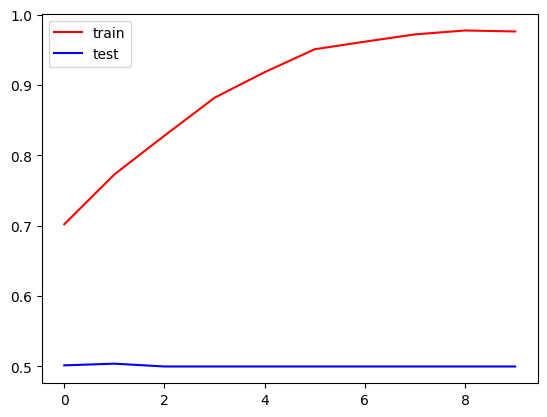

In [ ]:

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label  = 'test')
plt.legend()
plt.show()

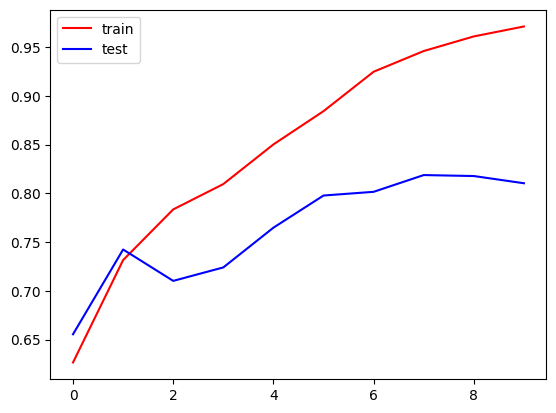

In [ ]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label  = 'test')
plt.legend()
plt.show()

In [ ]:
import cv2
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10.jpg')

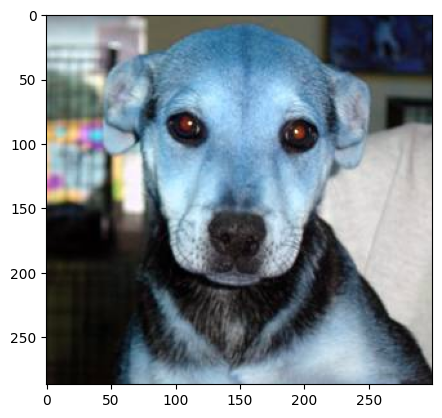

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(287, 300, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 275ms/step


array([[1.]], dtype=float32)

In [ ]:

#model
path_input =  '/content/test/cats/cat.10007.jpg'
image = cv2.imread(path_input)
image = cv2.resize(image,(256,256))
# plt.imshow(image)
image_reshape = image.reshape((1,256,256,3))
prediction = model.predict(image_reshape)
result = 0
for i in prediction :
  for j in i :
    result = j
if (result == 0):
  print("It's a cat")
else:
  print("Its a dog")

1/1 [==============================] - 0s 22ms/step
It's a cat


In [ ]:
import pickle

In [ ]:
with open('cat_vs_dog_model', 'wb') as f :
  pickle.dump(model,f)